In [1]:
from gams import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
rcParams.update({'font.family':"serif", "font.serif": ["helvetica"]})

result = {"UB":[], "LB":[], "Std":[], "noMW_UB":[], "noMW_LB":[], "noMW_Std":[], "noI_UB":[], "noI_LB":[], "noI_Std":[], "EB_UB":[], "EB_LB":[], "EB_Std":[]}

ws = GamsWorkspace("./")
db_MW = ws.add_database_from_gdx("SDDiP_MCLSCN_result.gdx")
for rec in db_MW["UB"]:
    result["UB"].append(rec.value)
for rec in db_MW["LB"]:
    result["LB"].append(rec.value)
for rec in db_MW["stdev_record"]:
    result["Std"].append(rec.value)

In [3]:
db_noMW = ws.add_database_from_gdx("SDDiP_MCLSCN_noMW_result.gdx")
for rec in db_noMW["UB"]:
    result["noMW_UB"].append(rec.value)
for rec in db_noMW["LB"]:
    result["noMW_LB"].append(rec.value)
for rec in db_noMW["stdev_record"]:
    result["noMW_Std"].append(rec.value)

In [4]:
db_noI = ws.add_database_from_gdx("SDDiP_MCLSCN_result_noI.gdx")
for rec in db_noI["UB"]:
    result["noI_UB"].append(rec.value)
for rec in db_noI["LB"]:
    result["noI_LB"].append(rec.value)
for rec in db_noI["stdev_record"]:
    result["noI_Std"].append(rec.value)

In [5]:
db_EB = ws.add_database_from_gdx("SDDiP_MCLSCN_result_nonstrengthen.gdx")
for rec in db_EB["UB"]:
    result["EB_UB"].append(rec.value)
for rec in db_EB["LB"]:
    result["EB_LB"].append(rec.value)
for rec in db_EB["stdev_record"]:
    result["EB_Std"].append(rec.value)

Text(0.5, 1.0, 'Case II')

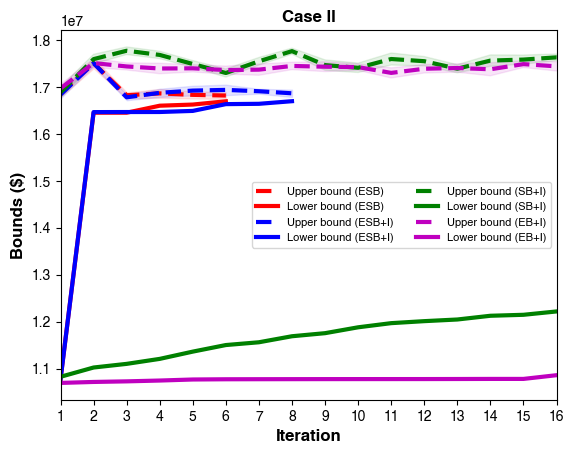

In [6]:
ub_l = np.array(result["UB"]) - 1.96 * np.array(result["Std"]) / np.sqrt(15)
ub_u = np.array(result["UB"]) + 1.96 * np.array(result["Std"]) / np.sqrt(15)
ub_noMW_l = np.array(result["noMW_UB"]) - 1.96 * np.array(result["noMW_Std"]) / np.sqrt(15)
ub_noMW_u = np.array(result["noMW_UB"]) + 1.96 * np.array(result["noMW_Std"]) / np.sqrt(15)
ub_noI_l = np.array(result["noI_UB"]) - 1.96 * np.array(result["noI_Std"]) / np.sqrt(15)
ub_noI_u = np.array(result["noI_UB"]) + 1.96 * np.array(result["noI_Std"]) / np.sqrt(15)
ub_EB_l = np.array(result["EB_UB"]) - 1.96 * np.array(result["EB_Std"]) / np.sqrt(15)
ub_EB_u = np.array(result["EB_UB"]) + 1.96 * np.array(result["EB_Std"]) / np.sqrt(15)

# plt.figure(figsize = (10, 6))
plt.plot(np.arange(1, len(result["noI_UB"]) + 1), result["noI_UB"], color = "r", linestyle = "--", label = "Upper bound (ESB)", linewidth = 3)
plt.fill_between(np.arange(1, len(result["noI_UB"]) + 1), ub_noI_l, ub_noI_u, color = "r", alpha = 0.1)
plt.plot(np.arange(1, len(result["noI_LB"]) + 1), result["noI_LB"], color = "r", linestyle = "-", label = "Lower bound (ESB)", linewidth = 3)
plt.plot(np.arange(1, len(result["UB"]) + 1), result["UB"], color = "b", linestyle = "--", label = "Upper bound (ESB+I)", linewidth = 3)
plt.fill_between(np.arange(1, len(result["UB"]) + 1), ub_l, ub_u, color = "b", alpha = 0.1)
plt.plot(np.arange(1, len(result["LB"]) + 1), result["LB"], color = "b", linestyle = "-", label = "Lower bound (ESB+I)", linewidth = 3)
plt.plot(np.arange(1, len(result["noMW_UB"]) + 1), result["noMW_UB"], color = "g", linestyle = "--", label = "Upper bound (SB+I)", linewidth = 3)
plt.fill_between(np.arange(1, len(result["noMW_UB"]) + 1), ub_noMW_l, ub_noMW_u, color = "g", alpha = 0.1)
plt.plot(np.arange(1, len(result["noMW_LB"]) + 1), result["noMW_LB"], color = "g", linestyle = "-", label = "Lower bound (SB+I)", linewidth = 3)
plt.plot(np.arange(1, len(result["EB_UB"]) + 1), result["EB_UB"], color = "m", linestyle = "--", label = "Upper bound (EB+I)", linewidth = 3)
plt.fill_between(np.arange(1, len(result["EB_UB"]) + 1), ub_EB_l, ub_EB_u, color = "m", alpha = 0.1)
plt.plot(np.arange(1, len(result["EB_LB"]) + 1), result["EB_LB"], color = "m", linestyle = "-", label = "Lower bound (EB+I)", linewidth = 3)

plt.xlim([1, len(result["UB"]) * 2])
plt.xticks(np.arange(1, len(result["UB"]) * 2 + 1))
plt.legend(prop = {"size": 8}, ncol = 2)

fdict = {"family": "Helvetica", "weight": "bold", "fontsize": 12}
plt.xlabel("Iteration", fontdict = fdict)
plt.ylabel("Bounds ($)", fontdict = fdict)
plt.title("Convergence curve for case II", fontdict = fdict)

In [7]:
result["noI_UB"]

[16858446.628815945,
 17506703.703432497,
 16824356.435410406,
 16863309.15986259,
 16832104.486427374,
 16817843.97561291]